# AAI Assignment 3
Author: Zhicong Sun  
SID: 12032471  
Date: 2020.11.26

## 1. Introduction

## 2. The Data analysis and Preprocessing
### 2.1 First meeting with data

In [1]:
# import basic module
import numpy as np
import pandas as pd

In [2]:
# read data from txt file
data = pd.read_csv("traindata.txt",sep='\s',engine='python')
test_data = pd.read_csv("testdata.txt",sep='\s',engine='python')
label = pd.read_csv("trainlabel.txt",sep='\s',engine='python')
print("data.head:\n",data.head(),"\n")
print("Shape of data: ",data.shape)
print("Shape of data label:",label.shape)
print("Shape of test data: ",test_data.shape)

data.head:
    52  1  0  125  212  0.1  1.1  168  0.2  1.0  2  2.1  3
0  53  1  0  140  203    1    0  155    1  3.1  0    0  3
1  70  1  0  145  174    0    1  125    1  2.6  0    0  3
2  61  1  0  148  203    0    1  161    0  0.0  2    1  3
3  62  0  0  138  294    1    1  106    0  1.9  1    3  2
4  58  0  0  100  248    0    0  122    0  1.0  1    0  2 

Shape of data:  (699, 13)
Shape of data label: (699, 1)
Shape of test data:  (324, 13)


***
**Note:**  
1. It can be seem that the data set has 699 row and 13 column, which means there are 13 feature. Because the data set has no feature names, so we use feature i to name them in the 1.2. After adding feature name, data will have one more row.  
2. Some data had been changed from integer type to float type when they were regarded as the data title such as the data in the first row and the sixth column (0.1),the first row and the seventh column (1.1) and so on. But it doesn't matter, when we add feature names to data, this type-error data will be changed to their original type automatically
***
### 2.2 Assign feature names to data

In [3]:
# assign a feature name to each column of data set, test set and label
feature_names = []
for i in range(data.shape[1]):
    feature_names.append("feature" + str(i))
data = pd.read_csv("traindata.txt",sep='\s',engine='python',names=feature_names)
test_data = pd.read_csv("testdata.txt",sep='\s',engine='python',names=feature_names)
label = pd.read_csv("trainlabel.txt",sep='\s',engine='python',names = ["label"])

print("feature names: ",feature_names,"\n")
print("data.info:")
data.info()
print("\ndata sum of Null values:",data.isnull().sum())
print("\ndata.head:\n",data.head(),"\n")
print("label.head:\n",label.head(),"\n")
print("Shape of data: ",data.shape)
print("Shape of data label:",label.shape)

feature names:  ['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12'] 

data.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   700 non-null    int64  
 1   feature1   700 non-null    int64  
 2   feature2   700 non-null    int64  
 3   feature3   700 non-null    int64  
 4   feature4   700 non-null    int64  
 5   feature5   700 non-null    int64  
 6   feature6   700 non-null    int64  
 7   feature7   700 non-null    int64  
 8   feature8   700 non-null    int64  
 9   feature9   700 non-null    float64
 10  feature10  700 non-null    int64  
 11  feature11  700 non-null    int64  
 12  feature12  700 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 71.2 KB

data sum of Null values: feature0     0
feature1     

### 2.3 Data exploration

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

1    361
0    339
Name: label, dtype: int64


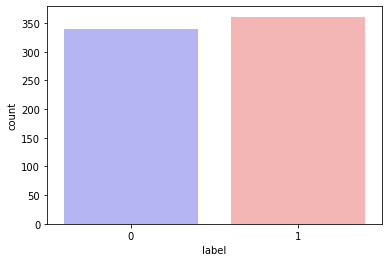

In [5]:
# label visualization
print(label.label.value_counts())
sns.countplot(x="label", data=label, palette="bwr")
plt.show()

### 2.4 Data preprocessing  
***  
Based on the data exploration, we can get the following conclusions:  
1. There is no missing value in data set 
2. There are two types of features: categorical and continous  
***

In [6]:
# divide features into categorical value and continous value
categorical_val = []
continous_val = []
for column in data.columns:
    print('---------------------------')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
print("\ncategorical features:",categorical_val)

---------------------------
feature0 : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
---------------------------
feature1 : [1 0]
---------------------------
feature2 : [0 1 2 3]
---------------------------
feature3 : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
---------------------------
feature4 : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 

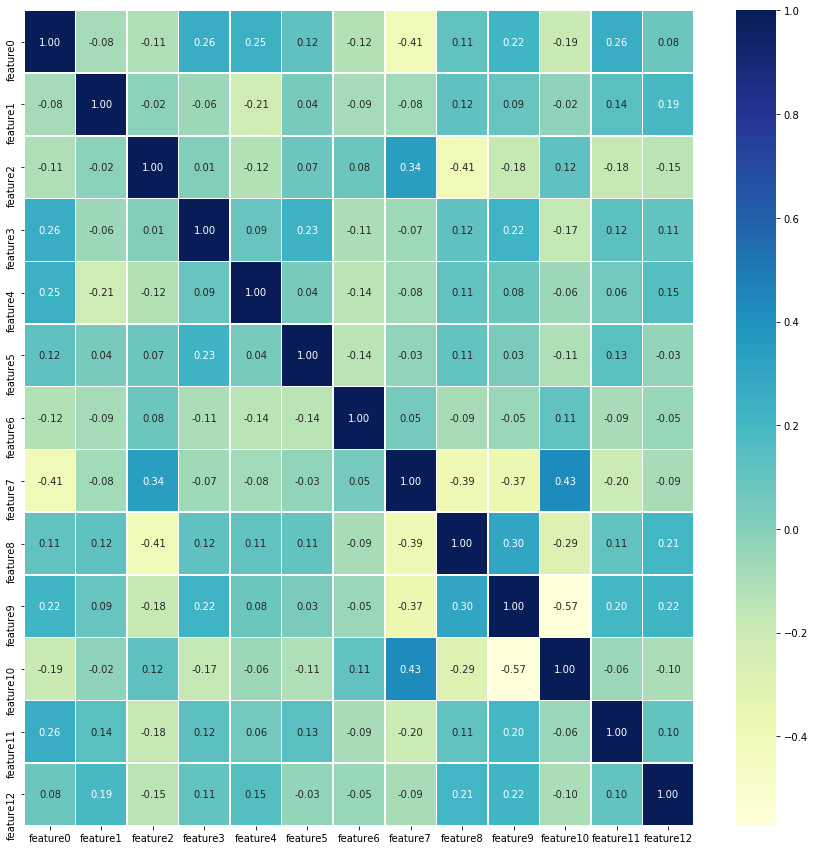

In [7]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

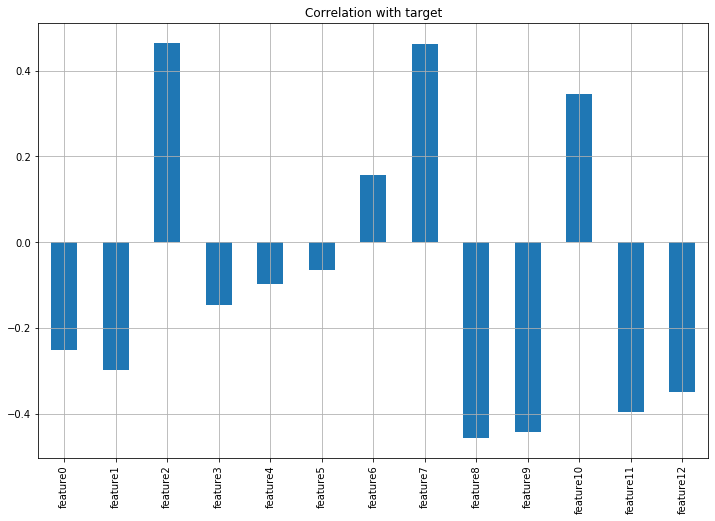

In [8]:
data.corrwith(label.label).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [9]:
dataset = pd.get_dummies(data, columns = categorical_val)
print(data.columns)
print(dataset.columns)

Index(['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
       'feature11', 'feature12'],
      dtype='object')
Index(['feature0', 'feature3', 'feature4', 'feature7', 'feature9',
       'feature1_0', 'feature1_1', 'feature2_0', 'feature2_1', 'feature2_2',
       'feature2_3', 'feature5_0', 'feature5_1', 'feature6_0', 'feature6_1',
       'feature6_2', 'feature8_0', 'feature8_1', 'feature10_0', 'feature10_1',
       'feature10_2', 'feature11_0', 'feature11_1', 'feature11_2',
       'feature11_3', 'feature11_4', 'feature12_0', 'feature12_1',
       'feature12_2', 'feature12_3'],
      dtype='object')


In [10]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['feature0', 'feature3', 'feature4', 'feature7', 'feature9']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])
dataset.head()

,feature0,feature3,feature4,feature7,feature9,feature1_0,feature1_1,feature2_0,feature2_1,feature2_2,...,feature10_2,feature11_0,feature11_1,feature11_2,feature11_3,feature11_4,feature12_0,feature12_1,feature12_2,feature12_3
0,-0.246336,-0.403577,-0.669358,0.789072,-0.061808,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.138766,0.427480,-0.835432,0.228923,1.688833,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.689930,0.704498,-1.370559,-1.063731,1.272013,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.721797,0.870710,-0.835432,0.487453,-0.895447,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0.829367,0.316672,0.843762,-1.882411,0.688466,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [11]:
# # divide the data set into two sets of training set and validation set
# from sklearn.model_selection import train_test_split
# train_data,validation_data,train_label,validation_label = train_test_split(dataset,label,test_size = 0.4,random_state=0)

# print("Shape of train data",train_data.shape)
# print("Shape of validation data",validation_data.shape)
# print("Shape of train label",train_label.shape)
# print("Shape of validation label",validation_label.shape)

## 3. The Model
### 3.1 K Nearest Neighbor(KNN)

In [12]:
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score,ShuffleSplit


In [13]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
scores = cross_val_score(clf_knn,dataset,label,cv=cv)
print(scores)
scores.mean()
scores.max()

[0.88928571 0.86071429 0.87142857 0.875      0.87142857 0.81785714
 0.86428571 0.85       0.87142857 0.84285714]


0.8892857142857142

0.9107142857142857


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_score_list = []
plt.figure(figsize=(5,5))
for i in range(1,20):    
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    clf_knn.fit(train_data,train_label)
    knn_score = clf_knn.score(validation_data,validation_label)
    knn_score_list.append(knn_score)
    
    validation_proba = clf_knn.predict_proba(validation_data)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(validation_label,validation_proba[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc_(false_positive_rate,true_positive_rate,roc_auc)
# plt.show()
plt.plot(range(1,20), knn_score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
acc = max(knn_score_list)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

# predict the label of test data
# predict_label = clf_knn.predict(test_data)
# print(predict_label)

NameError: name 'train_data' is not defined

### 3.2 Support Vector Machine (SVM)

In [84]:
from sklearn.svm import SVC
clf_svm = SVC(random_state = 1)
clf_svm.fit(train_data,train_label)

acc = clf_svm.score(validation_data,validation_label)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 92.14%


In [85]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(train_data,train_label)

acc = clf_dtc.score(validation_data,validation_label)*100
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 94.64%
